In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load data
HD_data = pd.read_csv("heart_disease_health_indicators_BRFSS2015.csv")
HD_data = HD_data.astype(int)
HD_data['Diabetes'] = np.where(HD_data['Diabetes'].isin([1, 2]), 1, HD_data['Diabetes'])



# Combine columns
HD_data['Combined'] = HD_data[['Stroke', 'HeartDiseaseorAttack', 'Diabetes']].astype(str).agg('_'.join, axis=1)

# Viewing the tail of DataFrame
print(HD_data.tail())

# Printing column names
print(HD_data.columns)

# Creating factors
HD_data['HighBP'] = HD_data['HighBP'].map({0: 'No', 1: 'Yes'})
HD_data['HighChol'] = HD_data['HighChol'].map({0: 'No', 1: 'Yes'})
HD_data['CholCheck'] = HD_data['CholCheck'].map({0: 'No', 1: 'Yes'})
HD_data['Smoker'] = HD_data['Smoker'].map({0: 'No', 1: 'Yes'})
HD_data['PhysActivity'] = HD_data['PhysActivity'].map({0: 'No', 1: 'Yes'})
HD_data['Fruits'] = HD_data['Fruits'].map({0: 'No', 1: 'Yes'})
HD_data['Veggies'] = HD_data['Veggies'].map({0: 'No', 1: 'Yes'})
HD_data['HvyAlcoholConsump'] = HD_data['HvyAlcoholConsump'].map({0: 'No', 1: 'Yes'})
HD_data['AnyHealthcare'] = HD_data['AnyHealthcare'].map({0: 'No', 1: 'Yes'})
HD_data['NoDocbcCost'] = HD_data['NoDocbcCost'].map({0: 'No', 1: 'Yes'})
HD_data['DiffWalk'] = HD_data['DiffWalk'].map({0: 'No', 1: 'Yes'})
HD_data['Sex'] = HD_data['Sex'].map({0: 'Male', 1: 'Female'})

# Create contingency tables
def create_contingency_table(df, category):
    contingency_table = df.groupby('Combined')[category].value_counts().unstack().fillna(0)
    total = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total, axis=0) * 100).add_prefix(f"{category}_percentage_")
    percentages = percentages.round(2)
    percentages = percentages.astype(str) + "%"
    return pd.concat([contingency_table, percentages, total.rename('Total')], axis=1)

# Generate all contingency tables
categories = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']
tables = {cat: create_contingency_table(HD_data, cat) for cat in categories}



        HeartDiseaseorAttack  HighBP  HighChol  CholCheck  BMI  Smoker  \
253675                     0       1         1          1   45       0   
253676                     0       1         1          1   18       0   
253677                     0       0         0          1   28       0   
253678                     0       1         0          1   23       0   
253679                     1       1         1          1   25       0   

        Stroke  Diabetes  PhysActivity  Fruits  ...  NoDocbcCost  GenHlth  \
253675       0         0             0       1  ...            0        3   
253676       0         1             0       0  ...            0        4   
253677       0         0             1       1  ...            0        1   
253678       0         0             0       1  ...            0        3   
253679       0         1             1       1  ...            0        2   

        MentHlth  PhysHlth  DiffWalk  Sex  Age  Education  Income  Combined  
253675        

In [2]:
#Age division -> 3 groups = 18 - 35: Young Adult -> 36 - 65: Adult -> 65+ Senior

In [23]:
# Create dropdown widget

import pandas as pd
import numpy as np
import ipywidgets as widgets  # Import widgets module from ipywidgets
from IPython.display import display

# Now you can proceed with defining your dropdown widget and other interactive elements

category_dropdown = widgets.Dropdown(
    options=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
             'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'],
    description='Select Variable:',
    disabled=False
)

# Define function to update output
def update_output(category):
    table = create_contingency_table(HD_data, category)
    display(table)

# Create an interactive widget and display the dropdown
widgets.interactive(update_output, category=category_dropdown)

interactive(children=(Dropdown(description='Select Variable:', options=('HighBP', 'HighChol', 'CholCheck', 'Sm…

In [49]:
print(max(HD_data["BMI"]))
print(min(HD_data["BMI"]))
'''
According to CHATGPT:

Underweight: BMI less than 18.5
Normal weight: BMI 18.5 to 24.9
Overweight: BMI 25 to 29.9
Obesity: BMI 30 or greater
'''

#HD_data["BMI"]

#import pandas as pd


# Define the bins and labels for BMI categories
bins = [0, 19, 25, 30, float('inf')]  # BMI category boundaries
labels = ['Underweight', 'Normalweight', 'Overweight', 'Obesity']  # BMI category labels

# Divide BMI values into categories
HD_data['BMI_category'] = pd.cut(HD_data['BMI'], bins=bins, labels=labels, right=False)

#print(HD_data)






98
12


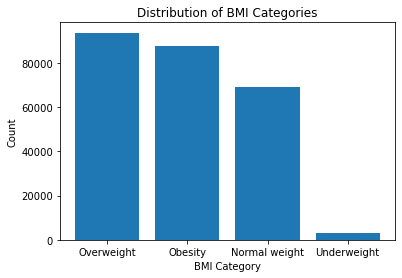

In [5]:
import matplotlib.pyplot as plt
category_counts = HD_data["BMI_category"].value_counts()

# Plot the distribution of BMI categories
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories')
plt.show()



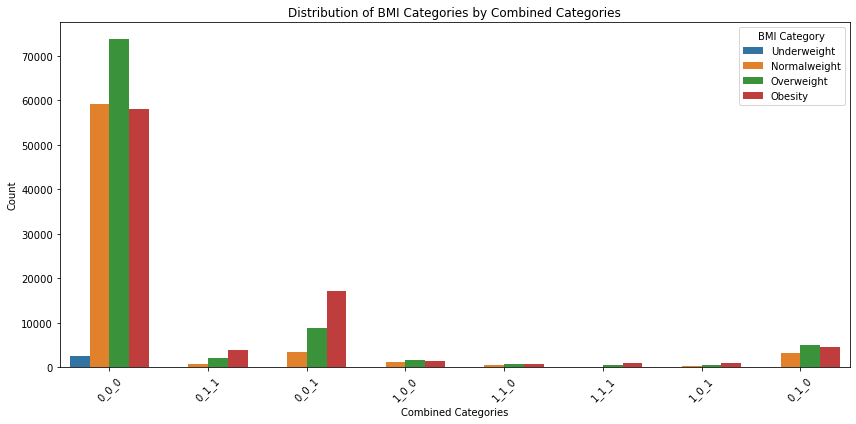

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='BMI_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of BMI Categories by Combined Categories')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='BMI Category')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


In [51]:
#print(max(HD_data["MentHlth"]))
#print(min(HD_data["MentHlth"]))


"""
Will divide into 3 groups
Low Mental Health: 0 - 10 
Mid Mental Health: 11 - 20
High Mental Health: 21 - 30 
"""

bins = [0, 10, 20, float('inf')]  
labels = ['Low Mental Health', 'Mid Mental Health', 'High Mental Health']  


HD_data['MentHlth_category'] = pd.cut(HD_data['MentHlth'], bins=bins, labels=labels, right=False)

print(HD_data['MentHlth_category'])



0          Mid Mental Health
1          Low Mental Health
2         High Mental Health
3          Low Mental Health
4          Low Mental Health
                 ...        
253675     Low Mental Health
253676     Low Mental Health
253677     Low Mental Health
253678     Low Mental Health
253679     Low Mental Health
Name: MentHlth_category, Length: 253680, dtype: category
Categories (3, object): ['Low Mental Health' < 'Mid Mental Health' < 'High Mental Health']


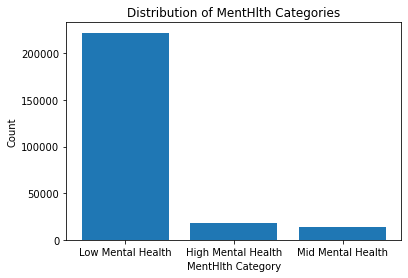

In [52]:

category_counts = HD_data["MentHlth_category"].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('MentHlth Category')
plt.ylabel('Count')
plt.title('Distribution of MentHlth Categories')
plt.show()

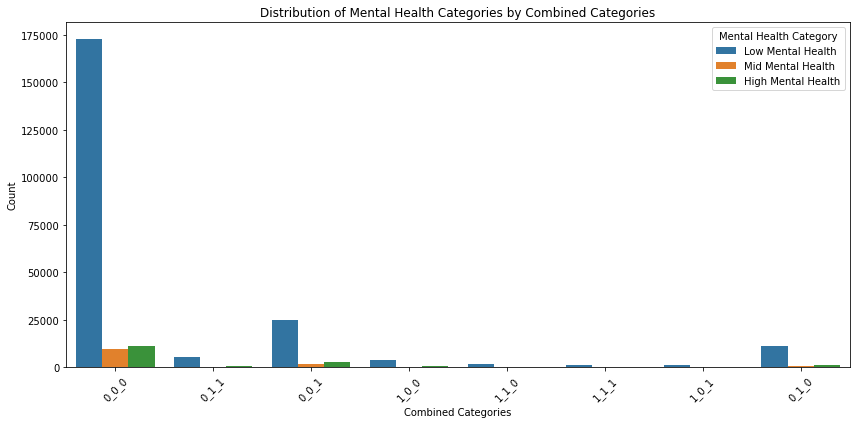

In [53]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='MentHlth_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Mental Health Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Mental Health Category')
plt.tight_layout() 
plt.show()

In [54]:

print(max(HD_data["Age"]))
print(min(HD_data["Age"]))

'''


Age division -> 3 groups 
Young Adult: 18 - 35 : 1 - 4
Adult -> 36 - 65: 5 - 9
Elder -> 65+:  10 - 13

'''

bins = [1, 5, 10, float('inf')]  
labels = ['Young Adult', 'Adult', 'Elder']  


HD_data['Age_category'] = pd.cut(HD_data['Age'], bins=bins, labels=labels, right=False)

print(HD_data['Age_category'])




13
1
0               Adult
1               Adult
2               Adult
3               Elder
4               Elder
             ...     
253675          Adult
253676          Elder
253677    Young Adult
253678          Adult
253679          Adult
Name: Age_category, Length: 253680, dtype: category
Categories (3, object): ['Young Adult' < 'Adult' < 'Elder']


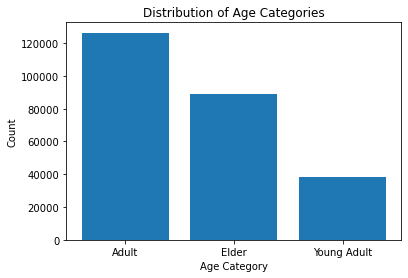

In [55]:
category_counts = HD_data["Age_category"].value_counts()

plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Age Category')
plt.ylabel('Count')
plt.title('Distribution of Age Categories')
plt.show()

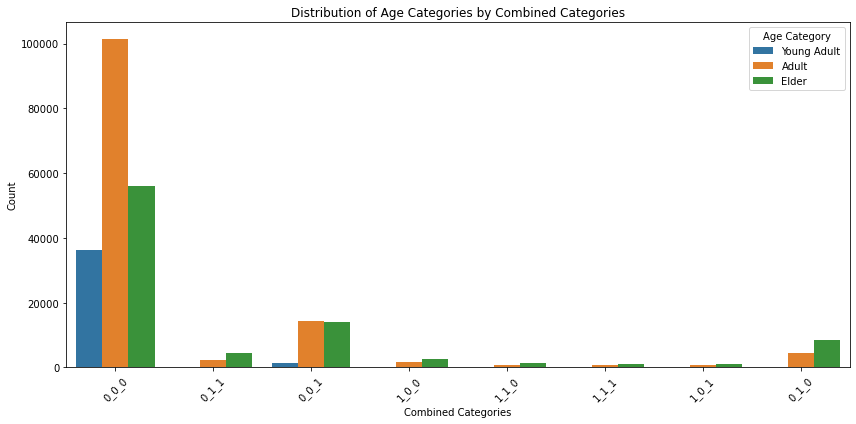

In [56]:
plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='Age_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Age Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Age Category')
plt.tight_layout() 
plt.show()

In [57]:
max(HD_data["Income"])
#min(HD_data["Income"])


"""
Divide into 3 groups

Low Income: 1 - 3
Mid Income: 4 - 6
High Income: 7 - 8 

"""


bins = [1, 4, 7, float('inf')]  
labels = ['Low Income', 'Mid Income', 'High Income']  


HD_data['Income_category'] = pd.cut(HD_data['Income'], bins=bins, labels=labels, right=False)

print(HD_data['Income_category'])



0          Low Income
1          Low Income
2         High Income
3          Mid Income
4          Mid Income
             ...     
253675    High Income
253676     Mid Income
253677     Low Income
253678     Low Income
253679     Low Income
Name: Income_category, Length: 253680, dtype: category
Categories (3, object): ['Low Income' < 'Mid Income' < 'High Income']


In [58]:
#print(HD_data["Income"])

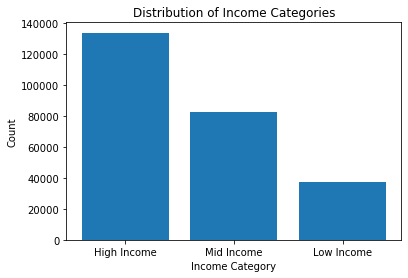

In [59]:
# Maybe redo this group!

category_counts = HD_data["Income_category"].value_counts()


'''
plt.bar(range(len(category_counts)), category_counts.values)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Categories')

plt.xticks(range(len(labels)), labels)

plt.show()

'''

#category_counts = HD_data["Age_category"].value_counts()

# Plot the distribution of BMI categories
plt.bar(category_counts.index, category_counts.values)
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.title('Distribution of Income Categories')
plt.show()

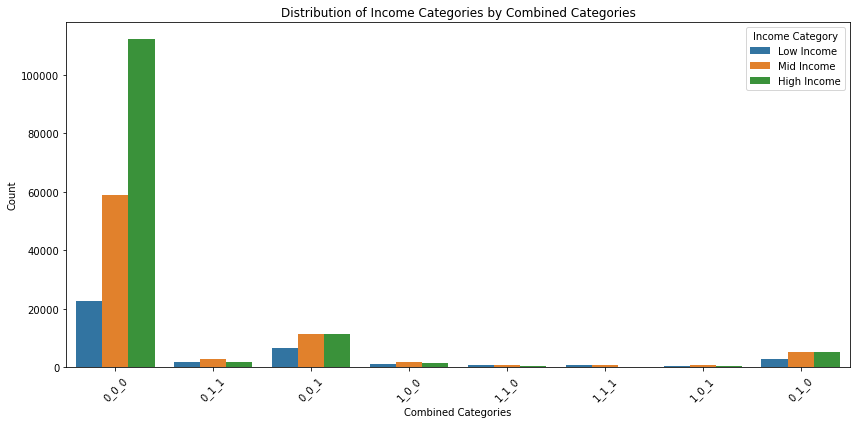

In [60]:
# This iS VERY INTERESTING!! Mostly all of the high income have nothing wrong with them>>>>>>!

plt.figure(figsize=(12, 6))  # Set the figure size

sns.countplot(x='Combined', hue='Income_category', data=HD_data)
plt.xlabel('Combined Categories')
plt.ylabel('Count')
plt.title('Distribution of Income Categories by Combined Categories')
plt.xticks(rotation=45) 
plt.legend(title='Income Category')
plt.tight_layout() 
plt.show()

In [61]:
def create_contingency_table(df, category):
    contingency_table = df.groupby('Combined')[category].value_counts().unstack().fillna(0)
    total = contingency_table.sum(axis=1)
    percentages = (contingency_table.div(total, axis=0) * 100).add_prefix(f"{category}_%_")
    percentages = percentages.round(2)
    percentages = percentages.astype(str) + "%"
    return pd.concat([contingency_table, percentages, total.rename('Total')], axis=1)

# Generate all contingency tables
categories = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
              'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', "BMI_category", "MentHlth_category", "Age_category","Income_category" ]
tables = {cat: create_contingency_table(HD_data, cat) for cat in categories}



category_dropdown = widgets.Dropdown(
    options=['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'PhysActivity', 'Fruits', 'Veggies',
             'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex', "BMI_category", "MentHlth_category", "Age_category", "Income_category"],
    description='Select Variable:',
    disabled=False
)

# Define function to update output
def update_output(category):
    table = create_contingency_table(HD_data, category)
    display(table)

# Create an interactive widget and display the dropdown
widgets.interactive(update_output, category=category_dropdown)

interactive(children=(Dropdown(description='Select Variable:', options=('HighBP', 'HighChol', 'CholCheck', 'Sm…